In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [54]:
cust=pd.read_csv(r'Customer.csv')
cust

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [55]:
prod=pd.read_csv(r'prod_cat_info.csv')
prod.rename(columns={"prod_sub_cat_code":"prod_subcat_code"},inplace=True)
prod

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [56]:
trans=pd.read_csv(r'Transactions.csv')
trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


### 1.Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final.
###Ensure to keep all customers who have done transactions with us and select the join type accordingly

In [57]:

final=trans.merge(prod,on=['prod_subcat_code','prod_cat_code'],how='left')

final.rename (columns={'cust_id': 'customer_Id'},inplace=True)

Customer_final=final.merge(cust,on=['customer_Id'],how= 'left')

In [58]:
Customer_final

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,22-05-1970,M,2.0


In [59]:

# converting "DOB" and "tran_date" from object dtype to dates


Customer_final["DOB"] = pd.to_datetime(Customer_final["DOB"], format="%d-%m-%Y")

Customer_final["tran_date"] = pd.to_datetime(Customer_final["tran_date"])


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-02-2014' in DD/MM/YYYY format. Provide format or specif

### 2.Prepare a summary report for the merged data set

In [60]:
#a. Get the column names and their corresponding data types

Customer_final.dtypes

transaction_id               int64
customer_Id                  int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

In [61]:
#b. Top 10 observations

Customer_final.head(10)

# Bottom 10 observations

Customer_final.tail(10)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,1976-08-10,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,1991-10-12,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,1982-01-15,M,1.0


In [62]:
#c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

Customer_final.describe()

,transaction_id,customer_Id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,city_code
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23045.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,5.482534
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,2.863499
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,3.000000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,5.000000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,10.000000


In [63]:
# d. Frequency tables for all the categorical variables

Customer_final.loc[:,Customer_final.dtypes=="object"].describe()

,Store_type,prod_cat,prod_subcat,Gender
count,23053,23053,23053,23044
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9311,6069,3048,11811


### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [64]:
num=Customer_final.loc[:,(Customer_final.dtypes=='int64') | (Customer_final.dtypes=='float64') ]

num.columns

Index(['transaction_id', 'customer_Id', 'prod_subcat_code', 'prod_cat_code',
       'Qty', 'Rate', 'Tax', 'total_amt', 'city_code'],
      dtype='object')

In [65]:
continuous = Customer_final.loc[:,['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]
continuous.columns


# Contiuous variables are 'prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt'

Index(['prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt'], dtype='object')

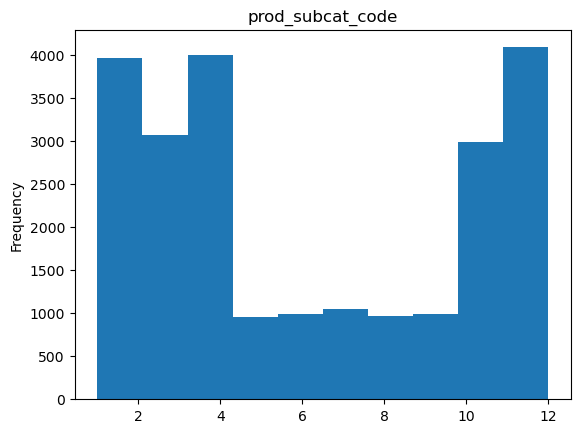

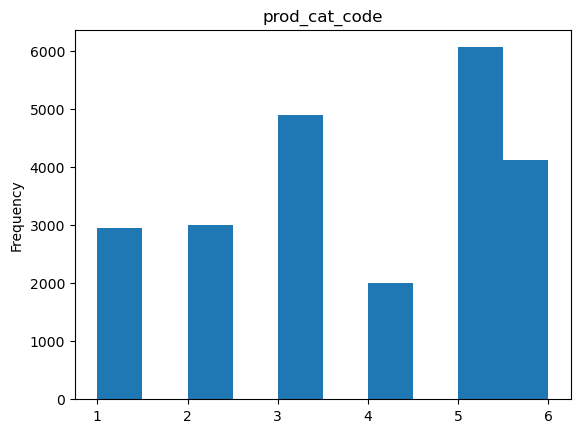

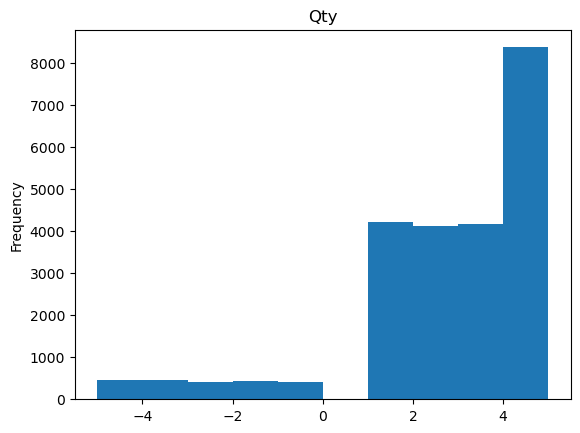

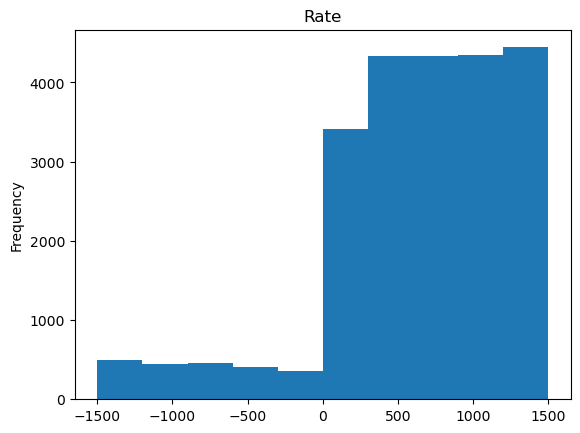

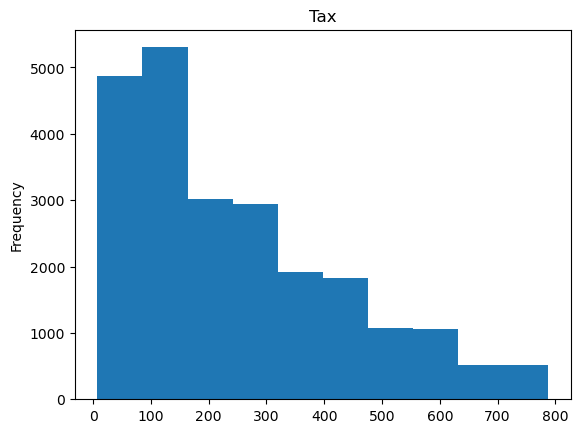

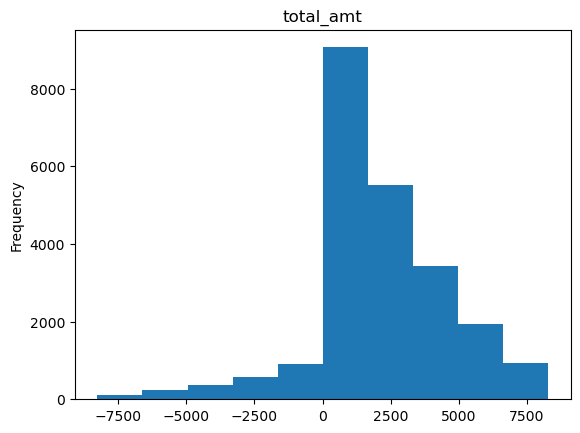

In [66]:
for i  in continuous.columns:
    continuous[i].plot(kind='hist')
    plt.title(i)
    plt.show()

In [67]:
categorical=Customer_final.loc[:,(Customer_final.dtypes== 'object') ]

categorical.columns

#categorical variables are 'Store_type', 'prod_cat', 'prod_subcat', 'Gender'

Index(['Store_type', 'prod_cat', 'prod_subcat', 'Gender'], dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


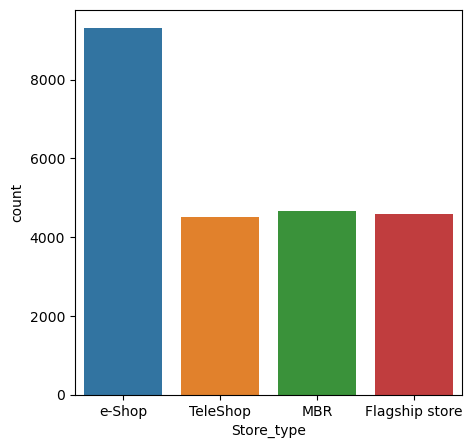

In [68]:
plt.figure(figsize=(5,5))
sns.countplot(categorical['Store_type'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


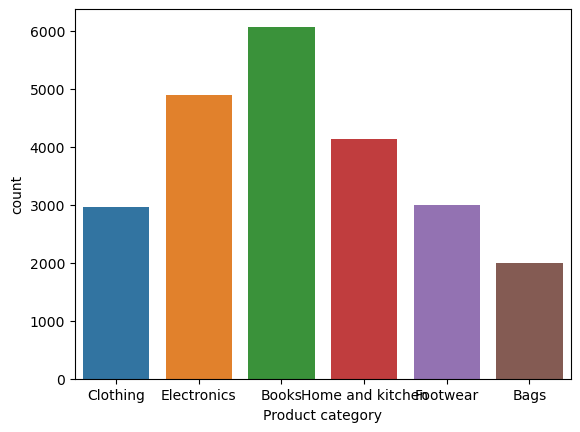

In [69]:

sns.countplot(categorical['prod_cat'])
plt.xlabel('Product category')
plt.show()

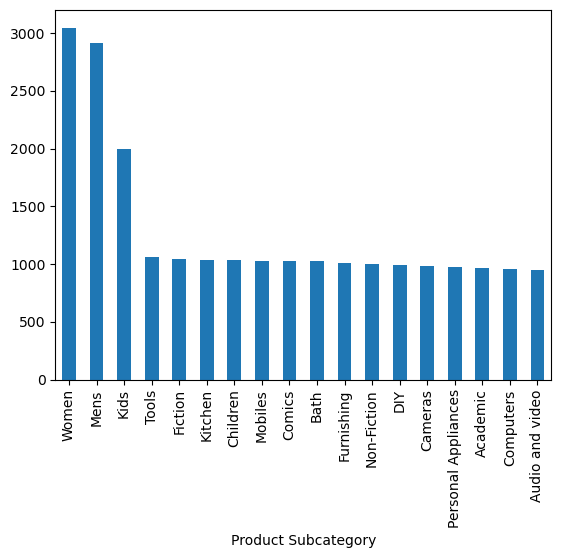

In [70]:

categorical.prod_subcat.value_counts().plot.bar()
plt.xlabel('Product Subcategory')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


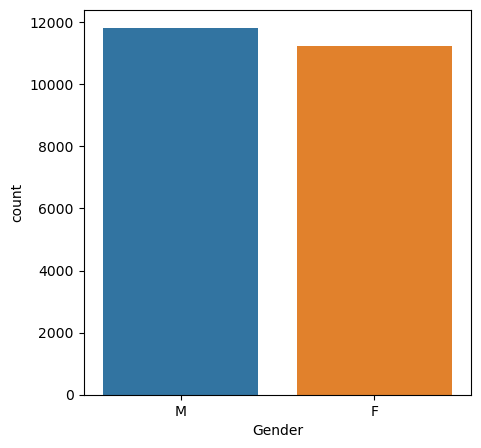

In [71]:
plt.figure(figsize=(5,5))
sns.countplot(categorical['Gender'])
plt.show()




### 4. Calculate the following information using the merged dataset :

In [72]:
# a. Time period of the available transaction data


Customer_final.sort_values(by='tran_date') 

min_date = Customer_final['tran_date'].min()
max_date = Customer_final['tran_date'].max()



In [73]:
print('Time period of the available transaction data is from ' + pd.Timestamp.strftime(min_date,format='%d-%m-%Y') +' to '+  pd.Timestamp.strftime(max_date,format='%d-%m-%Y'))

Time period of the available transaction data is from 02-01-2011 to 02-12-2014


In [74]:
# b. Count of transactions where the total amount of transaction was negative

neg=len(Customer_final[Customer_final.total_amt<0].total_amt)

print("Count of transactions where the total amount of transaction was negative is",neg)

Count of transactions where the total amount of transaction was negative is 2177


### 5. Analyze which product categories are more popular among females vs male customers.


In [75]:
pro=pd.pivot_table(data=Customer_final,values='Qty',columns = 'prod_cat',index='Gender',aggfunc= len)


In [76]:
#or

Customer_final.groupby(['prod_cat', 'Gender'])['transaction_id'].count().reset_index()

,prod_cat,Gender,transaction_id
0,Bags,F,994
1,Bags,M,1004
2,Books,F,2949
3,Books,M,3116
4,Clothing,F,1439
5,Clothing,M,1518
6,Electronics,F,2328
7,Electronics,M,2570
8,Footwear,F,1529
9,Footwear,M,1469


### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [77]:
code=Customer_final.groupby('city_code')['customer_Id'].count().sort_values(ascending =False).reset_index()

code['percentage'] = (code['customer_Id'] / code['customer_Id'].sum()) * 100

code.head(1)

,city_code,customer_Id,percentage
0,4.0,2422,10.509872



### 7. Which store type sells the maximum products by value and by quantity?

In [78]:
store=Customer_final.groupby('Store_type')['Qty','Rate'].sum().sort_values(by=['Qty'],ascending =False).reset_index()

C:\Users\Stevi\AppData\Local\Temp\ipykernel_5060\3180986304.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  store=Customer_final.groupby('Store_type')['Qty','Rate'].sum().sort_values(by=['Qty'],ascending =False).reset_index()


In [79]:
store.head(1)

,Store_type,Qty,Rate
0,e-Shop,22763,5941001



### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [80]:
amt=pd.pivot_table(data=Customer_final,index='Store_type',columns='prod_cat',values='total_amt',aggfunc=np.sum)
amt

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Store_type,,,,,,
Flagship store,870548.835,2488205.850,1194423.230,2215136.040,1234806.560,1712567.675
MBR,848678.675,2496039.195,1287686.335,2107514.565,1112163.715,1822403.570
TeleShop,789181.055,2545005.060,1241834.360,1973338.835,1235719.290,1579702.475
e-Shop,1616300.075,5293443.935,2527193.565,4426474.195,2637084.710,3324319.570


In [81]:
amt.loc['Flagship store',['Electronics','Clothing']].sum()

3409559.27


### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [82]:
tot=pd.pivot_table(data=Customer_final,index='Gender',columns='prod_cat',values='total_amt',aggfunc=np.sum)
tot

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2077985.65,6164692.235,3026750.805,5019354.210,3202552.99,4132177.335
M,2046722.99,6645972.775,3224079.495,5703109.425,3014672.05,4301075.480


In [83]:
tot.loc['M','Electronics']

5703109.425

### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts? 


In [109]:
p = Customer_final[Customer_final.total_amt>0].groupby('customer_Id')['transaction_id'].count().reset_index()
q = p[p.transaction_id>10]
q.customer_Id.count()


6

### 11. For all customers aged between 25 - 35, find out:

In [85]:
# a. What was the total amount spent for “Electronics” and “Books” product categories?

In [93]:
Customer_final['Age'] = dt.datetime.now().year - Customer_final['DOB'].dt.year

In [99]:
Customer_final[((Customer_final.prod_cat == 'Electronics')|(Customer_final.prod_cat == 'Books')) & ((Customer_final.Age >= 25) & (Customer_final.Age <=35))].groupby('prod_cat')['total_amt'].sum().reset_index()

,prod_cat,total_amt
0,Books,2667784.925
1,Electronics,2272147.410


In [ ]:
#  b.What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [107]:
Customer_final[((Customer_final['tran_date'] > '2014-01-01')& (Customer_final['tran_date'] < '2014-03-01')) & ((Customer_final.Age >= 25) & (Customer_final.Age <=35))].total_amt.sum()

340788.63